# Analisi dei dati raccolti

## Setup

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
def plotter(dataframes: list, index: str, names: list, space: int) -> None:
    xvalues_int = list()
    xvalues_str = list()
    for name in names:
        xvalues_str.extend(["", name, ""])

    plt.gcf().set_size_inches(10, 6)
    plt.title("Cifratura" if "E" in index else "Decifratura")
    plt.ylabel("Tempo di esecuzione")
    
    start = 1
    ymax = 0
    for dataframe in dataframes:
        series = dataframe[index]
        ymax = max(ymax, max(series))
        x = [start, start+1, start+2]
        xvalues_int.extend(x)
        plt.bar(x, [series.min(), series.mean(), series.max()])
        start += 5
    
    plt.xticks(xvalues_int, xvalues_str, rotation=90)
    plt.yticks([i for i in range(0, ymax+space, space)])
    plt.grid(axis="y")
    
    plt.show()

In [3]:
PATH = "../ascon128abi32v12/data/{}.csv"

IMPLEMENTATIONS = [
    "bi32", "bi32_armv6m", "bi32_lowreg", "bi32_lowsize", "ref"
]

bi32 = pd.read_csv(open(PATH.format("bi32"), "r"), delimiter=";")
bi32_armv6m = pd.read_csv(open(PATH.format("bi32_armv6m"), "r"), delimiter=";")
bi32_lowreg = pd.read_csv(open(PATH.format("bi32_lowreg"), "r"), delimiter=";")
bi32_lowsize = pd.read_csv(open(PATH.format("bi32_lowsize"), "r"), delimiter=";")
ref = pd.read_csv(open(PATH.format("ref"), "r"), delimiter=";")

DATAFRAMES = [
    bi32, bi32_armv6m, bi32_lowreg, bi32_lowsize, ref
]

## Grafici

Ogni grafico presente in questo notebook è suddiviso in cinque parti, ognuna delle quali contiene una rappresentazione dei dati raccolti durante il testing in fase di cifratura o decifratura di una data implementazione

Le implementazioni, che vanno a indicizzare l'asse delle X, vengono rappresentate da tre barre:
* la barra di sinistra rappresenta il valore **minimo**
* la barra centrale rappresenta il valore **medio**
* la barra di destra rappresenta il valore **massimo**

I valori sull'asse Y rappresentano il tempo di esecuzione in **microsecondi**

### PT vuoto

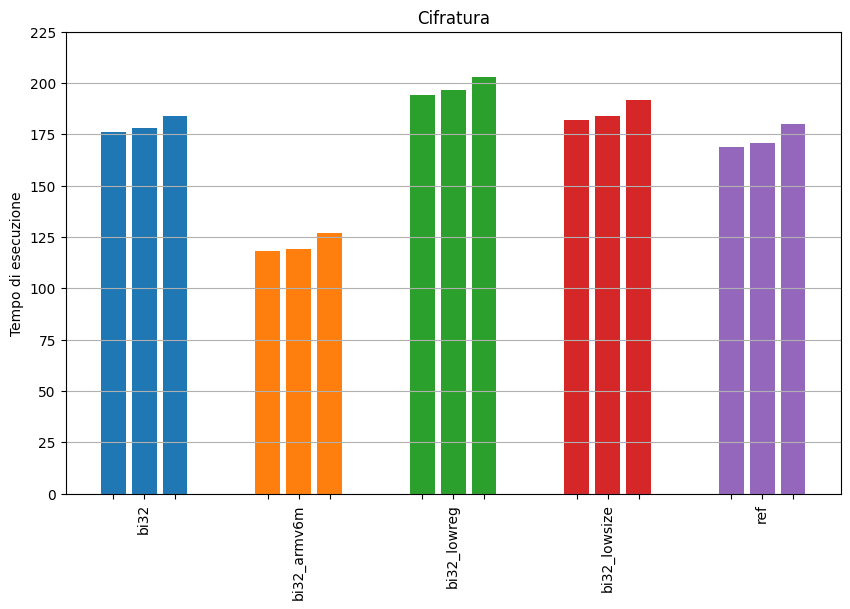

In [4]:
# Cifratura
plotter(DATAFRAMES, "0B-E", IMPLEMENTATIONS, 25)

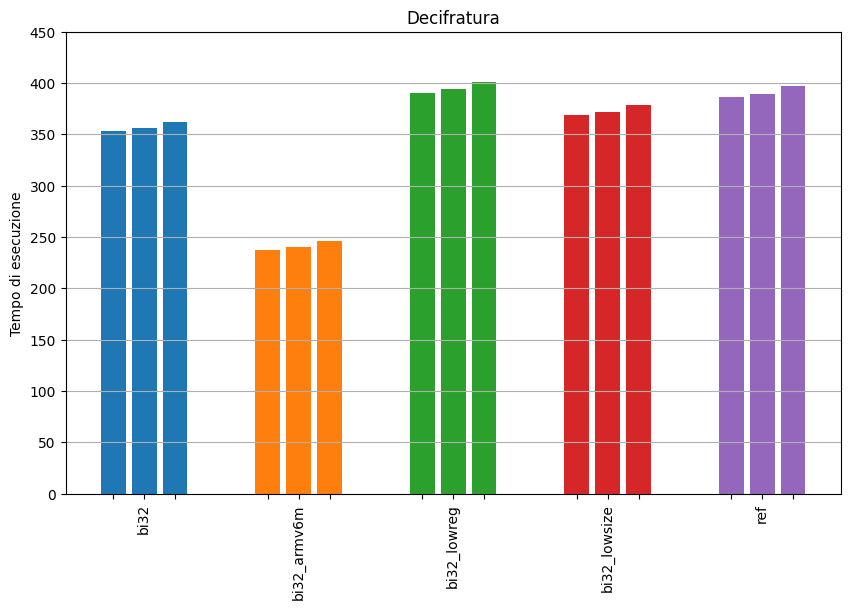

In [5]:
# Decifratura
plotter(DATAFRAMES, "0B-D", IMPLEMENTATIONS, 50)

### PT 1 byte

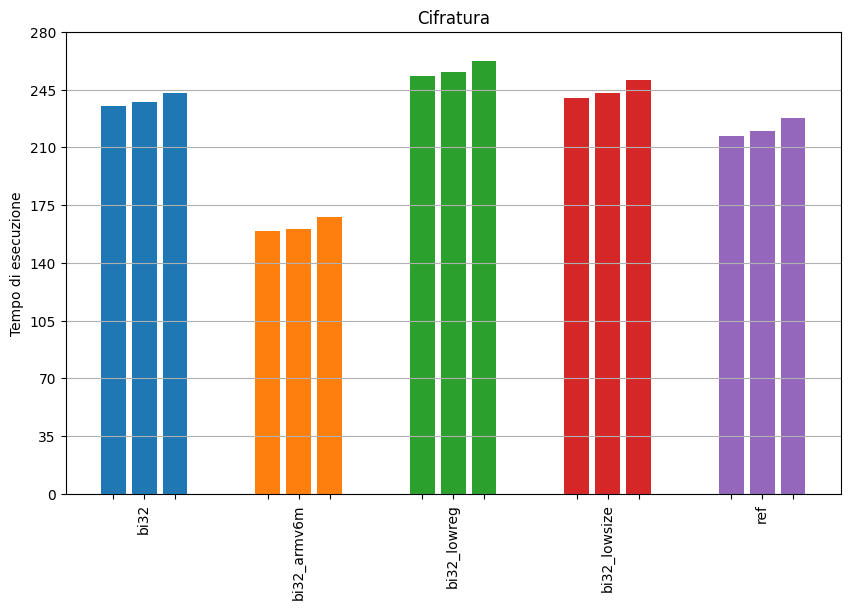

In [6]:
# Cifratura
plotter(DATAFRAMES, "1B-E", IMPLEMENTATIONS, 35)

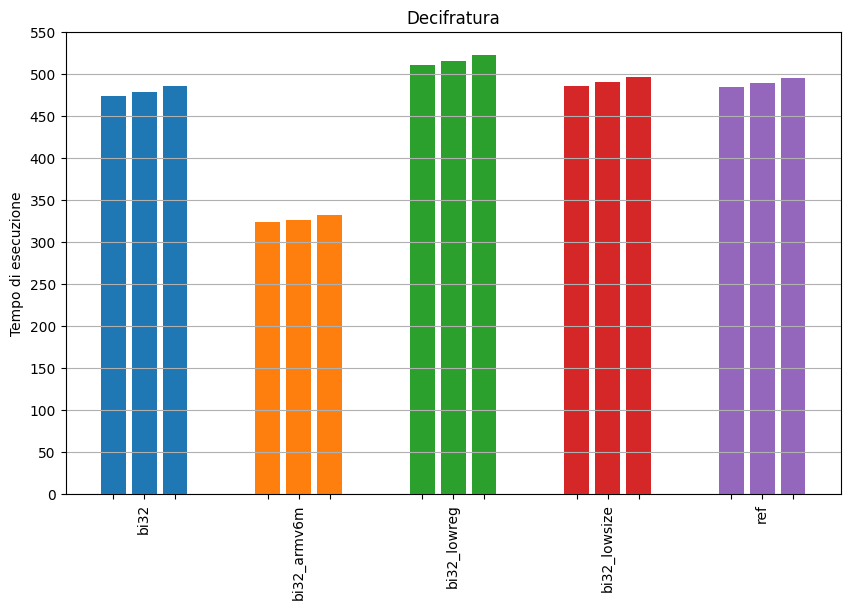

In [7]:
# Decifratura
plotter(DATAFRAMES, "1B-D", IMPLEMENTATIONS, 50)

### PT 16 byte

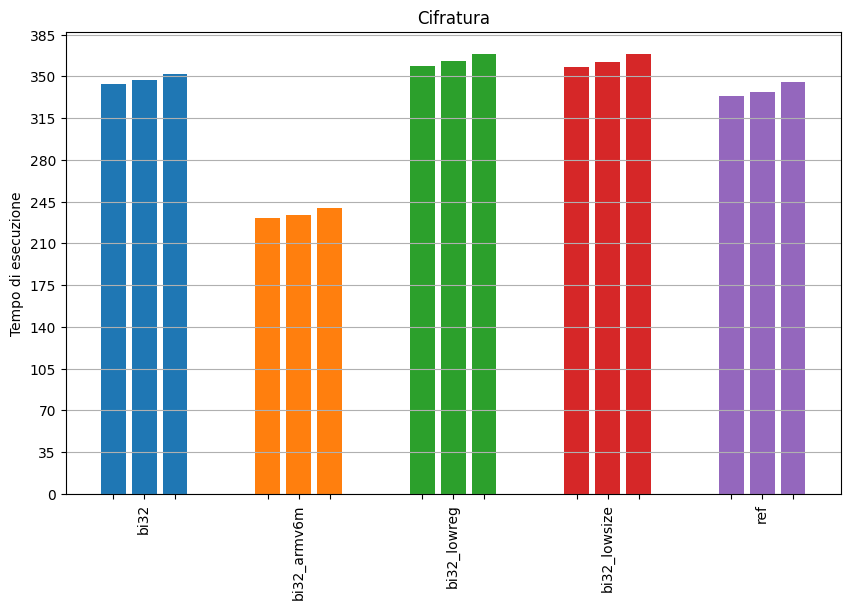

In [8]:
# Cifratura
plotter(DATAFRAMES, "16B-E", IMPLEMENTATIONS, 35)

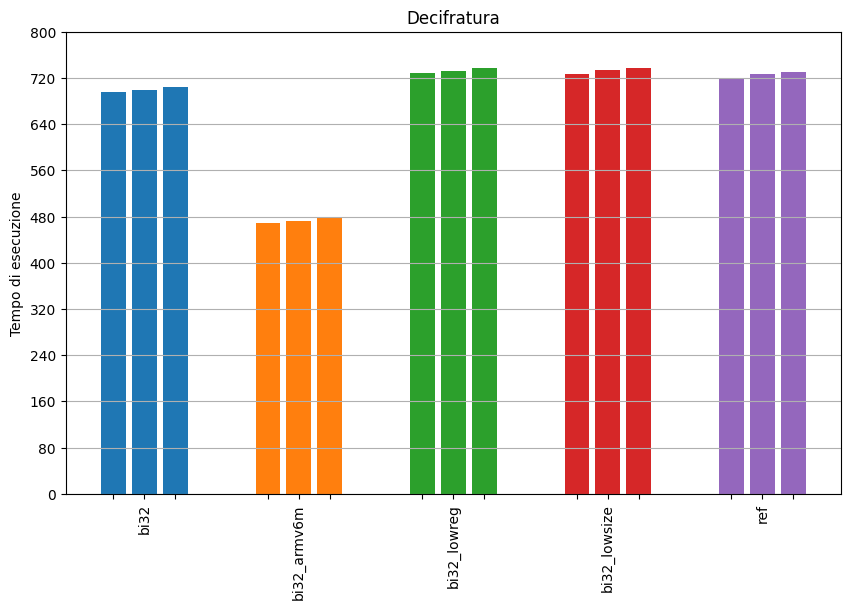

In [9]:
# Decifratura
plotter(DATAFRAMES, "16B-D", IMPLEMENTATIONS, 80)

### PT 32 byte

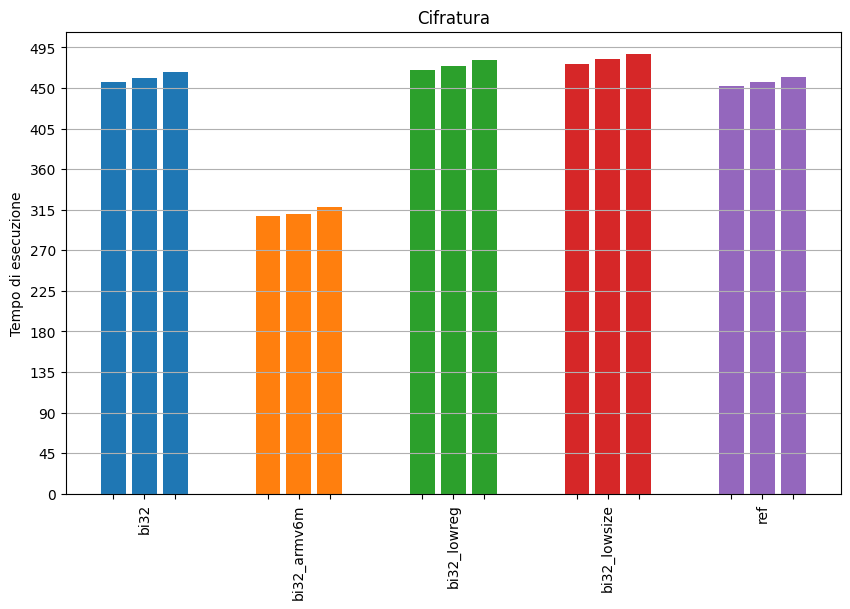

In [10]:
# Cifratura
plotter(DATAFRAMES, "32B-E", IMPLEMENTATIONS, 45)

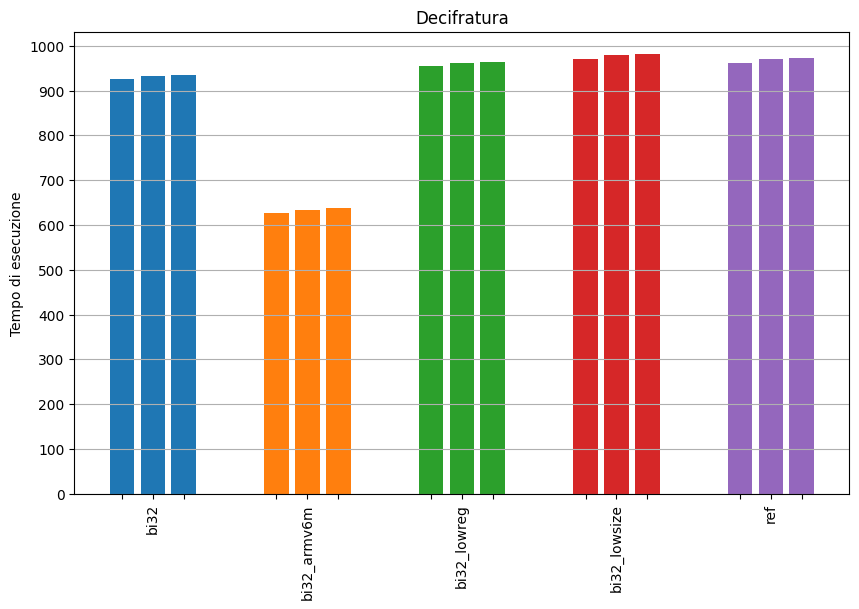

In [11]:
# Decifratura
plotter(DATAFRAMES, "32B-D", IMPLEMENTATIONS, 100)

### PT 48 byte

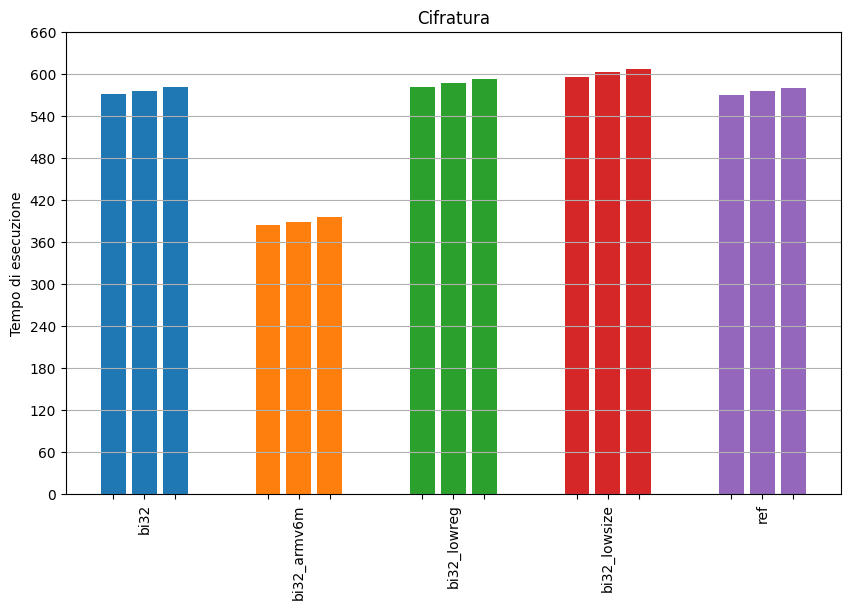

In [12]:
# Cifratura
plotter(DATAFRAMES, "48B-E", IMPLEMENTATIONS, 60)

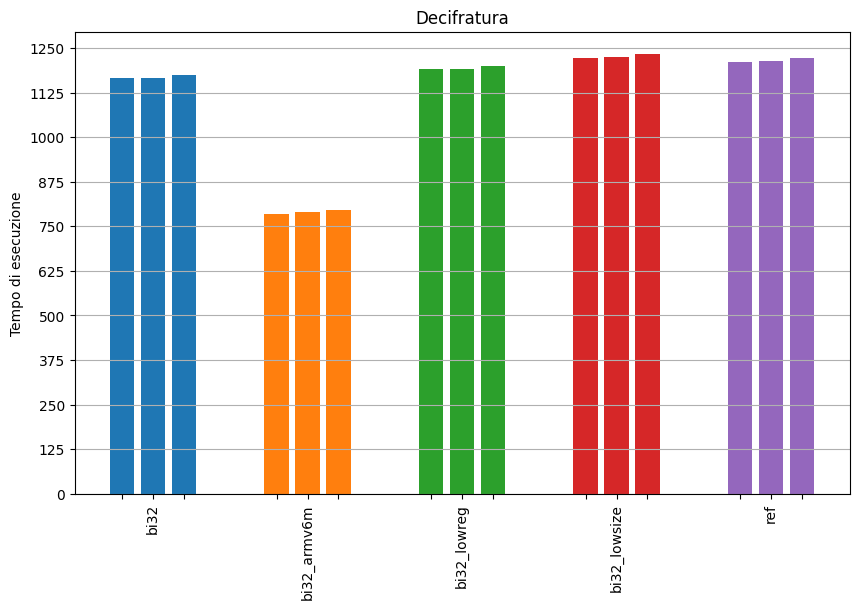

In [13]:
# Decifratura
plotter(DATAFRAMES, "48B-D", IMPLEMENTATIONS, 125)

### PT 64 byte

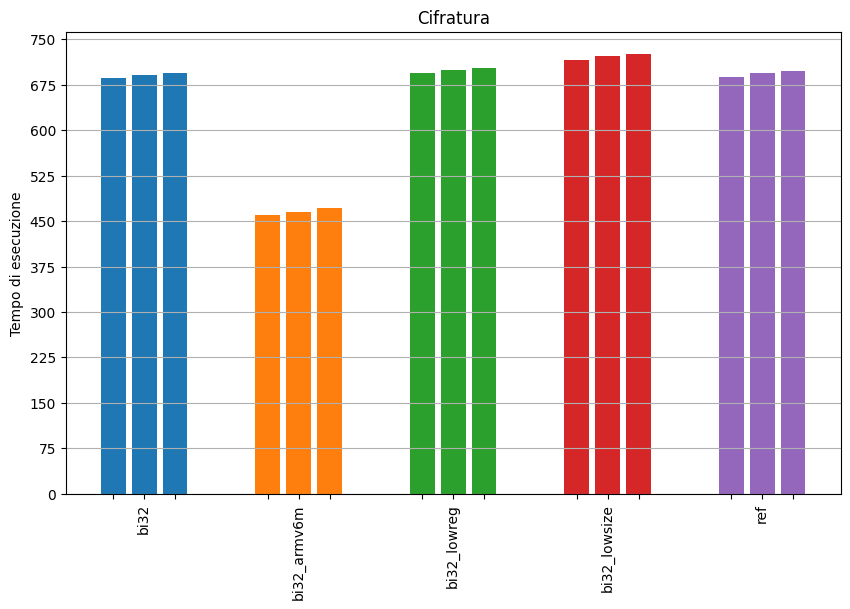

In [14]:
# Cifratura
plotter(DATAFRAMES, "64B-E", IMPLEMENTATIONS, 75)

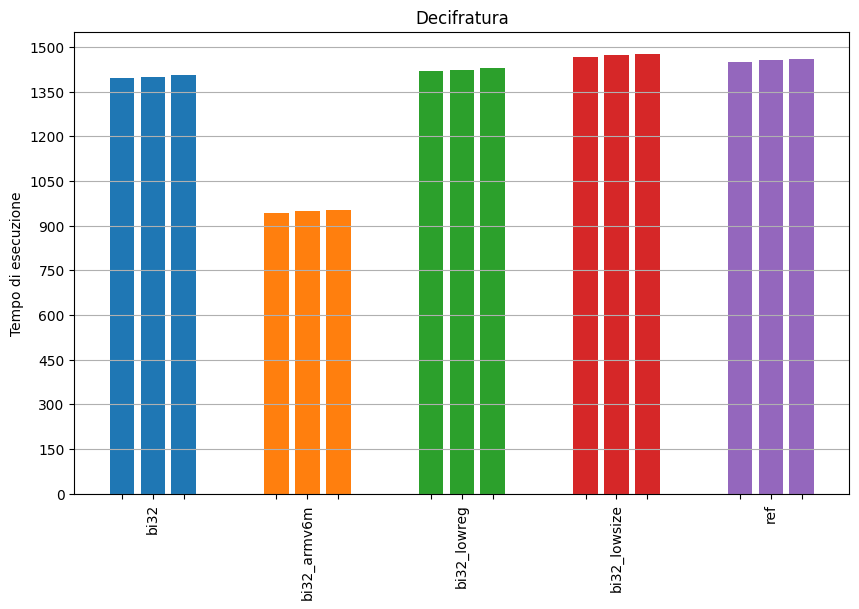

In [15]:
# Decifratura
plotter(DATAFRAMES, "64B-D", IMPLEMENTATIONS, 150)

## Conclusioni

### Migliori implementazioni

L'implementazione `bi32_armv6m` è quella che ha ottenuto i tempi di esecuzione migliori in ogni possibile grandezza di PT considerata

Le implementazioni `bi32` e `ref` si contendono a rotazione il secondo posto

### Peggiori implementazioni

L'implementazione `bi32_lowreg` è quella che ha ottenuto i tempi di esecuzione peggiori in quasi tutte le grandezze di PT considerate

### Dimensione eseguibile

Potevamo aspettarcelo dal nome: l'implementazione `bi32_lowsize` è quella che ha una dimensione dell'eseguibile molto piccola, occupando circa il $6/7$\% dello spazio disponibile, mentre l'implementazione `ref` è quella più pesante, occupando circa il $15/16$\% dello spazio disponibile

Considerando l'implementazione migliore, quindi la `bi32_armv6m`, essa occupa circa il $8/9$\% dello spazio disponibile, dimostrandosi un'ottima soluzione anche per quanto riguarda lo spazio occupato